# Jogadores com passes mais importantes na Bundesliga

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 20000
pd.options.display.max_columns = 2000

In [3]:
# Temporada 2020/21
#df = pd.read_html('https://fbref.com/en/share/j5J5P')[0]

# Temporada 2021/22
df = pd.read_html('https://fbref.com/en/share/AO9Wu')[0] # rodada 2
#df = pd.read_html('https://fbref.com/en/share/sX2eO')[0] # rodada 3

In [4]:
# As tabelas do FBref em html vem com dois problemas que precisam ser resolvidos:
# 1) O cabeçalho multidimensional, que dificulta a análise exploratória e a criação de visualizações
# 2) A repetição do cabeçalho ao longo do data frame (1º na 25ª linha, e depois a cada 26 linhas)
df

Unnamed: 0_level_0         Unnamed: 1_level_0 Unnamed: 2_level_0  \
                    Rk                     Player             Nation   
0                    1             Dickson Abiama             ng NGA   
1                    2                Ragnar Ache             de GER   
2                    3                Tyler Adams             us USA   
3                    4             Sargis Adamyan             am ARM   
4                    5              Manuel Akanji             ch SUI   
5                    6             Kevin Akpoguma             ng NGA   
6                    7               Nadiem Amiri             de GER   
7                    8        Sebastian Andersson             se SWE   
8                    9             Robert Andrich             de GER   
9                   10                   Angeliño             es ESP   
10                  11             Waldemar Anton             de GER   
11                  12    Christopher Antwi-Adjei             gh GHA   
12                  13           Charles Aránguiz             cl CHI   
13                  14          Maximilian Arnold             de GER   
14                  15               Takuma Asano             jp JPN   
15                  16         Santiago Ascacíbar             ar ARG   
16                  17              Taiwo Awoniyi             ng NGA   
17                  18             Mitchel Bakker             nl NED   
18                  19                 Ridle Baku             de GER   
19                  20               Aymen Barkok             ma MAR   
20                  21   Leandro Barreiro Martins             lu LUX   
21                  22      Jacob Barrett Laursen             dk DEN   
22                  23           Maximilian Bauer             de GER   
23                  24             Oliver Baumann             de GER   
24                  25             Timo Baumgartl             de GER   
25                  Rk                     Player             Nation   
26                  26      Julian Baumgartlinger             at AUT   
27                  27      Christoph Baumgartner             at AUT   
28                  28   Noah Joel Sarenren Bazee             ng NGA   
29                  29              Kevin Behrens             de GER   
30                  30                Stefan Bell             de GER   
31                  31        Armel Bella Kotchap             de GER   
32                  32            Jude Bellingham            eng ENG   
33                  33               László Bénes             sk SVK   
34                  34            Keanen Bennetts            eng ENG   
35                  35            Ramy Bensebaini             dz ALG   
36                  36       Kevin-Prince Boateng             gh GHA   
37                  37           Herbert Bockhorn             de GER   
38                  38          Jean-Paul Boëtius             nl NED   
39                  39               Rafael Borré             co COL   
40                  40             Dedryck Boyata             be BEL   
41                  41              Julian Brandt             de GER   
42                  42              Josip Brekalo             hr CRO   
43                  43              Brian Brobbey             nl NED   
44                  44                John Brooks             us USA   
45                  45             Cédric Brunner             ch SUI   
46                  46         Jacob Bruun Larsen             dk DEN   
47                  47            Sascha Burchert             de GER   
48                  48          Jonathan Burkardt             de GER   
49                  49           Daniel Caligiuri             it ITA   
50                  50                   Emre Can             de GER   
51                  Rk                     Player             Nation   
52                  51              Koen Casteels             be BEL   
53                  52           Max Christi

In [5]:
# "Limpando" a tabela

# Resolvendo o problema 1
df.columns = df.columns.get_level_values(-1)

# Resolvendo o problema 2
x = 0
while (25 + (26 * x)) < len(df):
    df = df.drop([25 + (26 * x)], axis = 0)
    x += 1
    
# Poderia resolver da forma abaixo, mas teria que atualizar as linhas que precisam ser excluídas de acordo com o tamanho do df    
#df = df.drop([25, 51, 77, 103, 129, 155, 181, 207, 233, 259, 285, 311], axis = 0)
df

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,1,Dickson Abiama,ng NGA,FW,Greuther Fürth,22-294,1998,1.3,18,22,81.8,239,86,12,15,80.0,5,5,100.0,0,0,NaN,1,0.6,+0.4,3,0,2,0,2,Matches
1,2,Ragnar Ache,de GER,"MF,FW",Eint Frankfurt,23-027,1998,0.2,1,2,50.0,6,0,1,1,100.0,0,1,0.0,0,0,NaN,1,0.0,+1.0,0,0,0,0,0,Matches
2,3,Tyler Adams,us USA,MF,RB Leipzig,22-191,1999,1.7,89,107,83.2,1592,369,39,44,88.6,34,41,82.9,12,17,70.6,0,0.0,0.0,1,17,2,0,8,Matches
3,4,Sargis Adamyan,am ARM,"FW,MF",Hoffenheim,28-093,1993,0.7,17,22,77.3,259,69,10,12,83.3,5,7,71.4,2,2,100.0,0,0.1,-0.1,1,1,0,0,4,Matches
4,5,Manuel Akanji,ch SUI,DF,Dortmund,26-036,1995,2.0,197,208,94.7,4599,1543,36,38,94.7,122,124,98.4,39,46,84.8,0,0.0,0.0,1,13,0,0,13,Matches
5,6,Kevin Akpoguma,ng NGA,DF,Hoffenheim,26-127,1995,1.8,77,91,84.6,1310,583,37,42,88.1,34,41,82.9,6,7,85.7,0,0.1,-0.1,2,7,0,0,6,Matches
6,7,Nadiem Amiri,de GER,FW,Leverkusen,24-301,1996,1.1,58,69,84.1,1018,130,29,31,93.5,20,24,83.3,8,12,66.7,0,0.0,0.0,1,2,2,0,2,Matches
7,8,Sebastian Andersson,se SWE,FW,Köln,30-040,1991,0.4,6,8,75.0,82,11,3,3,100.0,2,2,100.0,0,1,0.0,0,0.0,0.0,0,1,0,0,0,Matches
8,9,Robert Andrich,de GER,MF,Leverkusen,26-336,1994,0.3,13,14,92.9,170,49,7,7,100.0,5,6,83.3,0,0,NaN,0,0.0,0.0,0,1,1,0,2,Matches
9,10,Angeliño,es ESP,DF,RB Leipzig,24-232,1997,1.0,65,90,72.2,1090,279,37,40,92.5,18,25,72.0,8,23,34.8,0,0.0,0.0,1,1,3,2,5,Matches


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 332
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rk       321 non-null    object
 1   Player   321 non-null    object
 2   Nation   321 non-null    object
 3   Pos      321 non-null    object
 4   Squad    321 non-null    object
 5   Age      321 non-null    object
 6   Born     321 non-null    object
 7   90s      321 non-null    object
 8   Cmp      321 non-null    object
 9   Att      321 non-null    object
 10  Cmp%     317 non-null    object
 11  TotDist  321 non-null    object
 12  PrgDist  321 non-null    object
 13  Cmp      321 non-null    object
 14  Att      321 non-null    object
 15  Cmp%     311 non-null    object
 16  Cmp      321 non-null    object
 17  Att      321 non-null    object
 18  Cmp%     309 non-null    object
 19  Cmp      321 non-null    object
 20  Att      321 non-null    object
 21  Cmp%     278 non-null    object
 22  As

In [7]:
# Vendo a célula acima, dá pra notar que todas as colunas do data frame são do tipo objeto
# Para plotar as estatísticas no gráfico, é necessário que elas sejam interpretadas como números pelo Pandas
# Para isso, vamos converter cada uma das colunas necessárias para o gráfico

df['xA'] = pd.to_numeric(df['xA'], errors='coerce')
df['1/3'] = pd.to_numeric(df['1/3'], errors='coerce')
df['Ast'] = pd.to_numeric(df['Ast'], errors='coerce')
df['PPA'] = pd.to_numeric(df['PPA'], errors='coerce')

In [8]:
df.sort_values(['Ast'], ascending = False).head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
168,163,Andrej Kramarić,hr CRO,FW,Hoffenheim,30-066,1991,2.0,57,77,74.0,975,330,32,40,80.0,18,22,81.8,5,9,55.6,4,1.8,+2.2,5,9,6,2,10,Matches
291,281,Borna Sosa,hr CRO,DF,Stuttgart,23-215,1998,2.0,88,117,75.2,1464,507,49,57,86.0,28,35,80.0,11,19,57.9,3,0.9,+2.1,8,3,10,7,8,Matches
110,107,Erling Haaland,no NOR,FW,Dortmund,21-034,2000,2.0,35,48,72.9,358,97,20,25,80.0,6,9,66.7,1,3,33.3,3,0.7,+2.3,4,0,5,0,6,Matches
332,321,Simon Zoller,de GER,FW,Bochum,30-059,1991,2.0,41,51,80.4,722,80,16,17,94.1,20,26,76.9,4,6,66.7,2,0.4,+1.6,3,3,1,1,2,Matches
250,242,Marco Reus,de GER,"MF,FW",Dortmund,32-085,1989,2.0,63,77,81.8,1036,290,35,39,89.7,19,23,82.6,8,10,80.0,2,0.4,+1.6,3,2,3,0,7,Matches


In [9]:
# Criando esse novo data frame (df_xA), estou possibilitando que os nomes dos jogadores sejam gerados automaticamente no gráfico
# Primeiro eu organizo os jogadores em ordem decrescente de xA para ver quem são os melhores nesse quesito
df_xA = df.sort_values(['xA'], ascending = False)

# Em seguida, dou reset no index para que o jogador que lidera a lista tenha o valor 0 como index
# Os principais jogadores nesse quesito precisam ser os primeiros do index para facilitar o trabalho na hora de referenciá-los
df_xA = df_xA.reset_index(drop = True)
df_xA.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,163,Andrej Kramarić,hr CRO,FW,Hoffenheim,30-066,1991,2.0,57,77,74.0,975,330,32,40,80.0,18,22,81.8,5,9,55.6,4,1.8,+2.2,5,9,6,2,10,Matches
1,161,Filip Kostić,rs SRB,"FW,DF",Eint Frankfurt,28-296,1992,1.9,61,84,72.6,1197,516,28,33,84.8,20,27,74.1,10,17,58.8,0,1.1,-1.1,6,10,5,5,11,Matches
2,281,Borna Sosa,hr CRO,DF,Stuttgart,23-215,1998,2.0,88,117,75.2,1464,507,49,57,86.0,28,35,80.0,11,19,57.9,3,0.9,+2.1,8,3,10,7,8,Matches
3,251,Georginio Rutter,fr FRA,"FW,MF",Hoffenheim,19-126,2002,0.5,7,11,63.6,58,21,4,6,66.7,1,1,100.0,0,1,0.0,1,0.9,+0.1,1,1,0,0,0,Matches
4,244,Gio Reyna,us USA,MF,Dortmund,18-284,2002,1.7,84,112,75.0,1224,299,45,56,80.4,26,31,83.9,6,12,50.0,0,0.9,-0.9,7,5,4,1,7,Matches


In [10]:
# Ver explicação na célula acima
df_PPA = df.sort_values(['PPA'], ascending = False)
df_PPA = df_PPA.reset_index(drop = True)
df_PPA.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,281,Borna Sosa,hr CRO,DF,Stuttgart,23-215,1998,2.0,88,117,75.2,1464,507,49,57,86.0,28,35,80.0,11,19,57.9,3,0.9,+2.1,8,3,10,7,8,Matches
1,193,Kevin Mbabu,ch SUI,DF,Wolfsburg,26-127,1995,2.0,95,124,76.6,2011,773,25,29,86.2,57,64,89.1,13,26,50.0,0,0.8,-0.8,5,3,7,4,13,Matches
2,163,Andrej Kramarić,hr CRO,FW,Hoffenheim,30-066,1991,2.0,57,77,74.0,975,330,32,40,80.0,18,22,81.8,5,9,55.6,4,1.8,+2.2,5,9,6,2,10,Matches
3,294,Dominik Szoboszlai,hu HUN,"FW,DF",RB Leipzig,20-303,2000,1.1,54,69,78.3,1084,329,21,25,84.0,18,22,81.8,12,18,66.7,0,0.6,-0.6,5,2,6,3,5,Matches
4,79,Emil Forsberg,se SWE,MF,RB Leipzig,29-305,1991,2.0,61,74,82.4,900,216,34,39,87.2,23,24,95.8,3,8,37.5,0,0.5,-0.5,4,6,6,0,10,Matches


<function matplotlib.pyplot.show(close=None, block=None)>

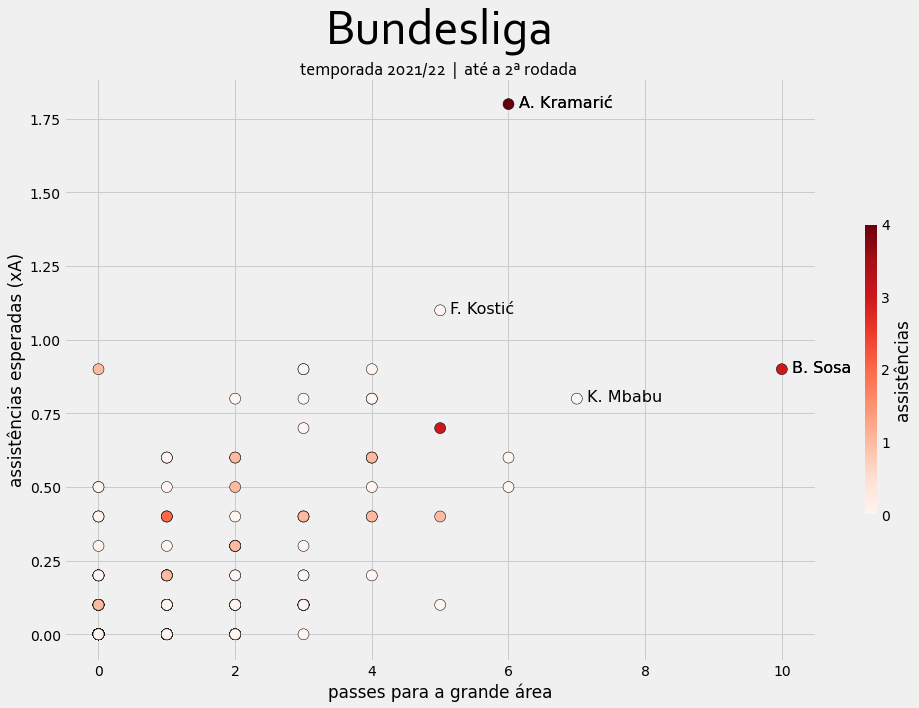

In [13]:
fig, ax = plt.subplots(figsize = (15, 10))

plt.style.use('fivethirtyeight')

plt.scatter(x = df['PPA'], y = df['xA'], c = df['Ast'], s = 120, cmap = 'Reds', edgecolor = 'black', linewidth = 0.5)

cbar = plt.colorbar(format = '%.f', shrink = 0.5)
cbar.set_label('assistências')
cbar.set_ticks([0, 1, 2, 3 ,4])

plt.xlabel('passes para a grande área')
plt.ylabel('assistências esperadas (xA)')

plt.title('Bundesliga', y = 1.05, fontsize = 50, fontname = 'Corbel')
plt.text(s = 'temporada 2021/22  |  até a 2ª rodada', y = 1.9, x = 2.95, fontsize = 18, fontname = 'Corbel')

for x in range(0, 3):
    # A cada iteração, é plotado no gráfico o nome de um dos líderes em PPA e em xA
    plt.text(x = df_PPA['PPA'][x] + 0.15, y = df_PPA['xA'][x] - 0.01, fontsize = 16, 
             s = '{}. {}'.format(df_PPA['Player'][x][0], df_PPA['Player'][x].split(' ')[1]))
    

    plt.text(x = df_xA['PPA'][x] + 0.15, y = df_xA['xA'][x] - 0.01, fontsize = 16, 
             s = '{}. {}'.format(df_xA['Player'][x][0], df_xA['Player'][x].split(' ')[1]))
    # A variável s ficou complexa para não mostrar nome e sobrenome completos no gráfico
    # Fiz ajustes nas variáveis x e y para ajustar levemente onde os nomes aparecem no gráfico

plt.show

# A cada atualização, vou precisar mudar poucas coisas no código:
# 2) O subtítulo
# 3) As ticks da color bar

## Salvar imagem?

In [12]:
#plt.savefig('xAPPA.png', dpi = 300)